# Imports

In [22]:
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

# Loading MNIST Data Offline

In [2]:
# Downloaded from https://s3.amazonaws.com/img-datasets/mnist.pkl.gz
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path='mnist.pkl.gz')
train_images = tf.cast(train_images, tf.float32) / 255.
test_images = tf.cast(test_images, tf.float32) / 255.

In [ ]:
train_images.shape, train_labels.shape

(TensorShape([60000, 28, 28]), (60000,))

# Model

In [160]:
# Hyperparameters

#lr = 0.01
optimizer = Nadam(0.001) #SGD(0.01)

hidden_dim = 128 #128 #64 #32 #16
batch_size = 32
epochs = 10 # Number of training iterations

In [161]:
model = keras.Sequential()
model.add(LSTM(units=hidden_dim, input_shape=(None, 28)))
#model.add(SimpleRNN(units=hidden_dim, input_shape=(None, 28)))
model.add(BatchNormalization())
model.add(Dense(10))
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128)               80384     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 82,186
Trainable params: 81,930
Non-trainable params: 256
_________________________________________________________________
None


In [162]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    metrics=["accuracy"],
)

In [163]:
history = model.fit(train_images, train_labels, validation_split=0.1, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1688/1688 [==============================] - 70s 39ms/step - loss: 0.2709 - accuracy: 0.9129 - val_loss: 0.1051 - val_accuracy: 0.9693
Epoch 2/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.0963 - accuracy: 0.9704 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 3/10
1688/1688 [==============================] - 66s 39ms/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.0520 - val_accuracy: 0.9852
Epoch 4/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0569 - accuracy: 0.9821 - val_loss: 0.0418 - val_accuracy: 0.9873
Epoch 5/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0488 - val_accuracy: 0.9847
Epoch 6/10
1688/1688 [==============================] - 65s 38ms/step - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0392 - val_accuracy: 0.9903
Epoch 7/10
1688/1688 [==============================] - 62s 37ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0355 -

# Plotting

In [166]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_accuracy, test_loss

313/313 [==============================] - 3s 10ms/step - loss: 0.0381 - accuracy: 0.9893


(0.989300012588501, 0.03808964788913727)

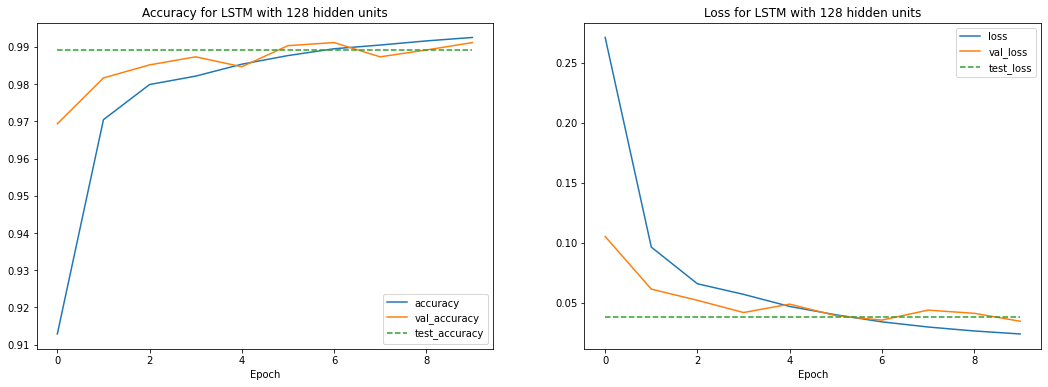

In [167]:
def layer_name(string):
    if 'rnn' in string:
        return 'Simple RNN'
    if 'lstm' in string:
        return 'LSTM'
    if 'gru' in string:
        return 'GRU'
    return

layer = layer_name(model.layers[0].name)


fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0].plot([test_accuracy] * len(history.history['accuracy']), '--', label='test_accuracy')
axs[0].set_title(f'Accuracy for {layer} with {model.layers[0].units} hidden units')
axs[0].set_xlabel('Epoch')
axs[0].legend()

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].plot([test_loss] * len(history.history['loss']), '--', label='test_loss')
axs[1].set_title(f'Loss for {layer} with {model.layers[0].units} hidden units')
axs[1].set_xlabel('Epoch')
axs[1].legend()